In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [53]:
input_data = pd.read_csv('raw_data/raw_remnant_input.csv')

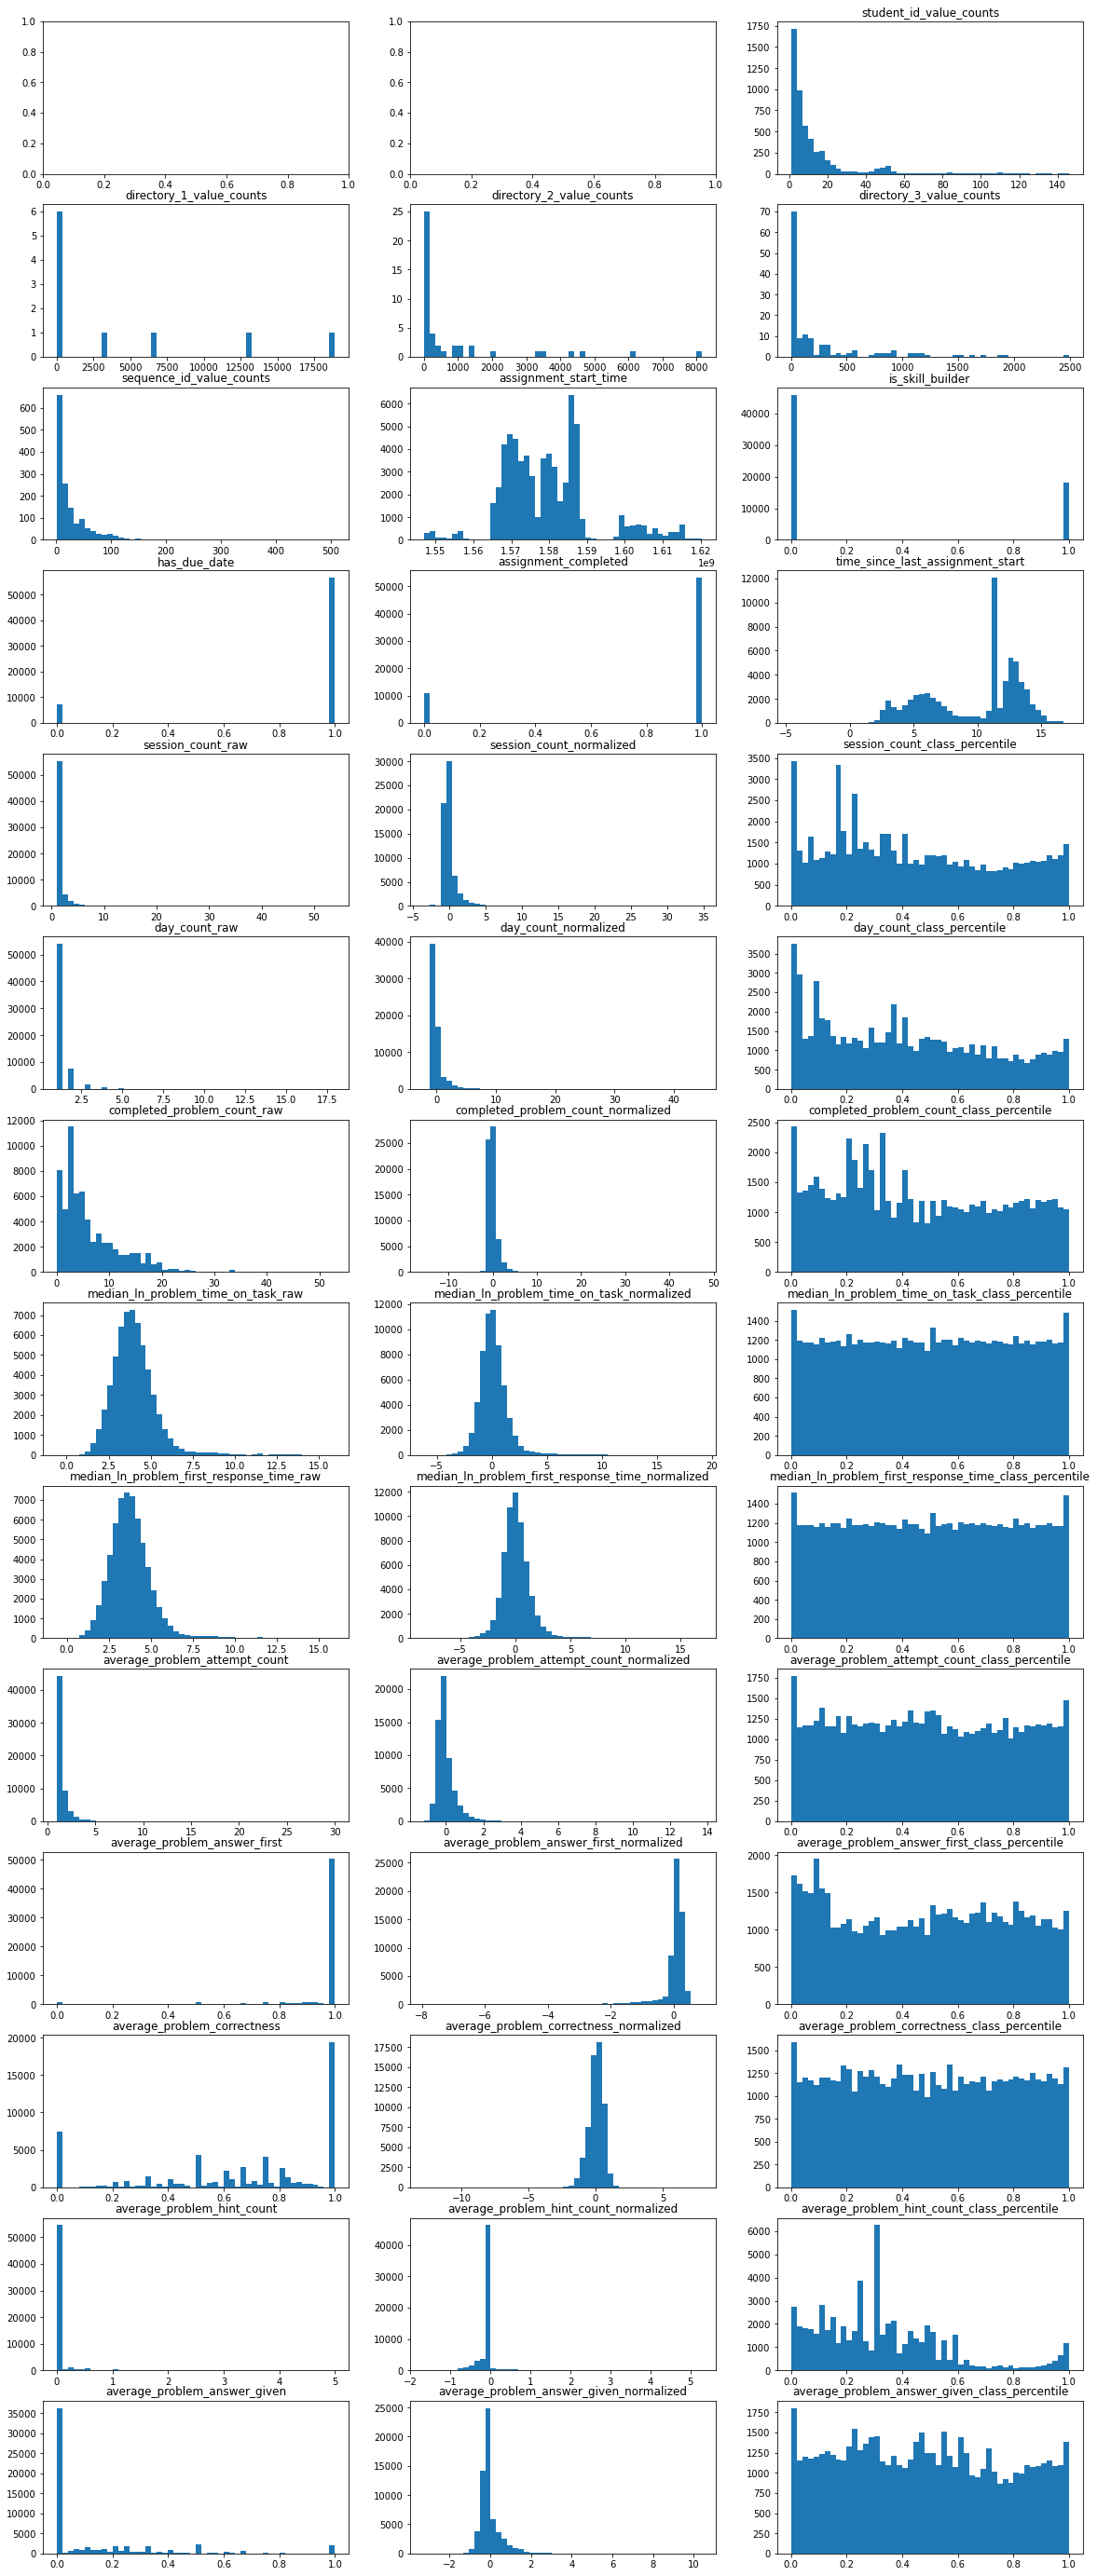

In [59]:
# Look at the distributions of all the raw inputs, or the frequency of values in the raw inputs

PLOT_ROWS = 14
PLOT_COLS = 3

fig, axs = plt.subplots(PLOT_ROWS, PLOT_COLS, figsize=(20,50))

offset = PLOT_ROWS * PLOT_COLS - len(input_data.columns)

for i in range(len(input_data.columns)):
    r = int((i + offset) / PLOT_COLS)
    c = (i + offset) % PLOT_COLS
    col = input_data.columns[i]
    axs[r, c].hist(input_data[col].value_counts() if i < 5 else input_data[col], 50)
    axs[r, c].set_title(col + '_value_counts' if i < 5 else col)
fig.savefig('first_look.png', dpi=200)

In [82]:
# An explicit feature for which cluster the time_since_last_assignment_start falls into

clusters = 4
times = input_data['time_since_last_assignment_start'].values.reshape(-1, 1)
input_data['time_since_last_assignment_start_cluster'] = GaussianMixture(n_components=clusters).fit(times).predict(times)